In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 前処理

In [86]:
#データ読み込み
df = pd.read_csv("../data/train.csv")
df

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [87]:
#欠損値の削除
df = df.dropna()
df

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460                      3   
1       Business              235                      3   
2       Business             1142                      2   
3       Business              562                      2   
4       Business              214                      3   
...          ...              ...                    ...   
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                       4  ...                       5   
1                                       2  ...                       1   
2                                       2  ...                       5   
3                                       5  ...                       2   
4                                       3  ...                       3   
...                                   ...  ...                     ...   
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
0                      4                 3                 4                4   
1                      1                 5                 3                1   
2                      4                 3                 4                4   
3                      2                 5                 3                1   
4                      3                 4                 4                3   
...                  ...               ...               ...              ...   
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
0                      5            5                          25   
1                      4            1                           1   
2                      4            5                           0   
3                      4            2                          11   
4                      3            3                           0   
...                  ...          ...                         

In [88]:
#欠損値有無の確認

is_null = df.isnull()
null_counts = is_null.sum()
null_counts

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [89]:
#Class毎に抽出する

df_Busi = df.query('Class == "Business"')
df_Eco = df.query('Class == "Eco"')
df_Plus = df.query(' Class == "Plus"')

In [90]:
#id,unnamed,class,satisfaction 不要な列を消す
#ecoクラスのsatisfaction　は残す

df_Busi_del = df_Busi.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)
df_Eco_del = df_Eco.drop(['id','Unnamed: 0','Class'], axis=1)
df_Plus_del = df_Plus.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)

In [91]:
# One-hot encodingを実行する

df_Busi_enc = pd.get_dummies(df_Busi_del, dtype=int,drop_first=True)
df_Eco_enc = pd.get_dummies(df_Eco_del, dtype=int,drop_first=True)
df_Plus_enc = pd.get_dummies(df_Plus_del, dtype=int,drop_first=True)

In [92]:
'''
Gender_Male　　0=男性,1=女性
'''

df_Eco_enc

Age  Flight Distance  Inflight wifi service  \
5        26             1180                      3   
6        47             1276                      2   
9        20             1061                      3   
10       24             1182                      4   
12       53              834                      1   
...     ...              ...                    ...   
103895   24             1055                      1   
103896   57              867                      4   
103898   50             1620                      3   
103899   23              192                      2   
103902   22             1000                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
5                                       4                       2   
6                                       4                       2   
9                                       3                       3   
10                                      5                       5   
12                                      4                       4   
...                                   ...                     ...   
103895                                  1                       1   
103896                                  5                       5   
103898                                  1                       3   
103899                                  1                       2   
103902                                  1                       1   

        Gate location  Food and drink  Online boarding  Seat comfort  \
5                   1               1                2             1   
6                   3               2                2             2   
9                   4               2                3             3   
10                  4               2                5             2   
12                  4               1                1             1   
...               ...             ...              ...           ...   
103895              2               1                1             1   
103896              5               4                4             4   
103898              4               2                3             2   
103899              3               2                2             2   
103902              5               1                1             1   

        Inflight entertainment  ...  Baggage handling  Checkin service  \
5                            1  ...                 4                4   
6                            2  ...                 4                3   
9                            2  ...                 4                4   
10                           2  ...                 5                3   
12                           1  ...                 3                4   
...                        ...  ...               ...              ...   
103895                       1  ...                 5                5   
103896                       4  ...                 3                1   
103898                       2  ...                 4                2   
103899                       2  ...                 4                2   
103902                       1  ...                 1                5   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
5                      4            1                           0   
6                      5            2                           9   
9                      3            2                           0   
10                     5            2                           0   
12                     4            1                          28   
...                  ...          ...                         ...   
103895                 4            1                          13   
103896                 3            4                           0   
103898                 4            2                           0   
103899                 3            2                           3   
10390

In [93]:
df_Eco_enc = df_Eco_enc.reset_index(drop=True)
Eco_enc_df = df_Eco_enc

In [94]:
Eco_enc_df.shape

(46593, 22)

In [95]:
Eco_enc_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'satisfaction_satisfied'],
      dtype='object')

In [96]:
Eco_enc_df.info()

'''
0   Age                                年齢
1   Flight Distance                    飛行距離
2   Inflight wifi service              機内wifiサービス
3   Departure/Arrival time convenient  出発・到着時間の利便性
4   Ease of Online booking             オンライン予約のしやすさ
5   Gate location                      ゲートの位置
6   Food and drink                     飲食
7   Online boarding                    オンライン搭乗
8   Seat comfort                       シートの快適性
9   Inflight entertainment             機内エンターテインメント
10  On-board service                    機内サービス
11  Leg room service                    レッグルームサービス
12  Baggage handling                    手荷物取扱い
13  Checkin service                     チェックイン・サービス
14  Inflight service                    機内サービス
15  Cleanliness                         清潔さ
16  Departure Delay in Minutes          出発の遅れ（分）
17  Arrival Delay in Minutes            到着遅延（分）
18  Gender_Male                         性別_男性
19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客
20  Type of Travel_Personal Travel      旅行タイプ_個人旅行
21  satisfaction_satisfied              満足度_満足

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46593 entries, 0 to 46592
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                46593 non-null  int64  
 1   Flight Distance                    46593 non-null  int64  
 2   Inflight wifi service              46593 non-null  int64  
 3   Departure/Arrival time convenient  46593 non-null  int64  
 4   Ease of Online booking             46593 non-null  int64  
 5   Gate location                      46593 non-null  int64  
 6   Food and drink                     46593 non-null  int64  
 7   Online boarding                    46593 non-null  int64  
 8   Seat comfort                       46593 non-null  int64  
 9   Inflight entertainment             46593 non-null  int64  
 10  On-board service                   46593 non-null  int64  
 11  Leg room service                   46593 non-null  int

'\n0   Age                                年齢\n1   Flight Distance                    飛行距離\n2   Inflight wifi service              機内wifiサービス\n3   Departure/Arrival time convenient  出発・到着時間の利便性\n4   Ease of Online booking             オンライン予約のしやすさ\n5   Gate location                      ゲートの位置\n6   Food and drink                     飲食\n7   Online boarding                    オンライン搭乗\n8   Seat comfort                       シートの快適性\n9   Inflight entertainment             機内エンターテインメント\n10  On-board service                    機内サービス\n11  Leg room service                    レッグルームサービス\n12  Baggage handling                    手荷物取扱い\n13  Checkin service                     チェックイン・サービス\n14  Inflight service                    機内サービス\n15  Cleanliness                         清潔さ\n16  Departure Delay in Minutes          出発の遅れ（分）\n17  Arrival Delay in Minutes            到着遅延（分）\n18  Gender_Male                         性別_男性\n19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客\n20  Type of Travel_P

## Ecoクラス分析

### 次元削減とクラスタリング

In [19]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler

In [20]:
# satisfaction_satisfied列を一時的に削除
satisfaction_satisfied_column = Eco_enc_df['satisfaction_satisfied']
Eco_enc_df.drop('satisfaction_satisfied', axis=1, inplace=True)

# StandardScalerを適用
scaler = StandardScaler()
Eco_enc_df_std = scaler.fit_transform(Eco_enc_df)

# satisfaction_satisfied列を再度追加
Eco_enc_df['satisfaction_satisfied'] = satisfaction_satisfied_column


In [26]:
#T-sneで次元削減
tsne = TSNE(n_components=2)
eco_tsne = tsne.fit_transform(Eco_enc_df_std)

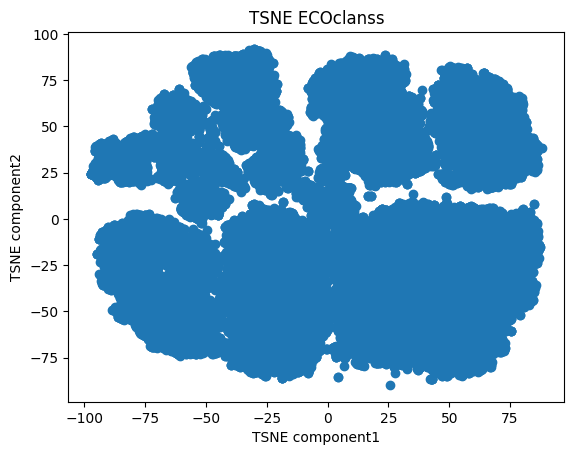

In [27]:
plt.scatter(eco_tsne[:,0],eco_tsne[:,1])
plt.xlabel('TSNE component1')
plt.ylabel('TSNE component2')
plt.title('TSNE ECOclanss')
plt.show()

In [85]:
# DBSCANによるクラスタリング
dbscan = DBSCAN(eps = 5,min_samples= 3).fit(eco_tsne)
labels = dbscan.fit_predict(Eco_enc_df)

# グラフ化
plt.scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=labels)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('DBSCAN Clustering')
plt.show()

ValueError: could not convert string to float: '20s'

In [ ]:
import plotly.graph_objects as go

x = df_Plus_enc_2d[:, 0]
y = df_Plus_enc_2d[:, 1]
z = df_Plus_enc_2d[:, 2]

# 3D散布図の作成
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# グラフのレイアウト設定
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
# グラフのレイアウト設定（幅と高さの指定）
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=800,  # 幅の設定（ピクセル単位）
    height=800  # 高さの設定（ピクセル単位）
)

# グラフの表示
fig.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


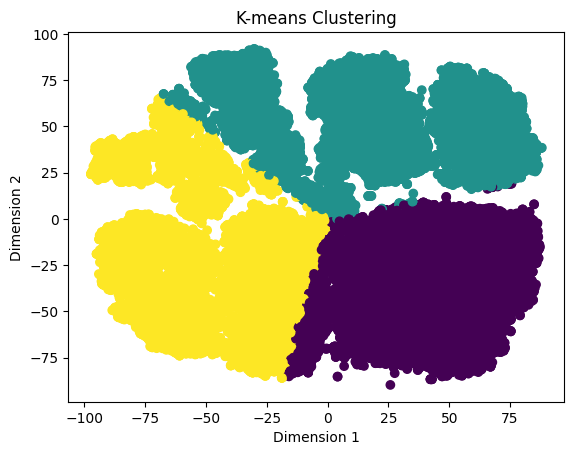

In [100]:
kmeans = KMeans(n_clusters=3, max_iter = 300)
eco_kmeans = kmeans.fit_predict(eco_tsne)

plt.scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=eco_kmeans)
plt.title('K-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

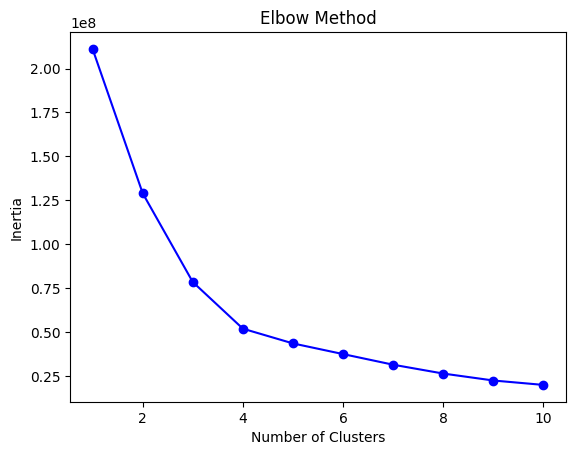

In [31]:
inertia = []
k_values = range(1, 11)  # クラスタ数の範囲を設定

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=300)
    kmeans.fit(eco_tsne)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [32]:
# クラスタリング結果を元のデータフレームに追加
Eco_enc_df['Cluster'] = eco_kmeans

'''
# クラスタリング結果のラベリング
labels = [0,1,2,3,4,5,6]
Eco_enc_df['Cluster Label'] = [labels[label] for label in eco_kmeans]
'''
#Eco_enc_df = Eco_enc_df.drop('Cluster Label', axis=1)



"\n# クラスタリング結果のラベリング\nlabels = [0,1,2,3,4,5,6]\nEco_enc_df['Cluster Label'] = [labels[label] for label in eco_kmeans]\n"

### クラスターの数値要約

In [33]:
Eco_enc_df.head(2)

Age  Flight Distance  Inflight wifi service  \
0   26             1180                      3   
1   47             1276                      2   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       2              1   
1                                  4                       2              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  ...  \
0               1                2             1                       1  ...   
1               2                2             2                       2  ...   

   Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  \
0                4                 4            1                           0   
1                3                 5            2                           9   

   Arrival Delay in Minutes  Gender_Male  Customer Type_disloyal Customer  \
0                       0.0            0                                0   
1                      23.0            1                                0   

   Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
0                               1                       0        1  
1                               1                       0        3  

[2 rows x 23 columns]

In [34]:
#クラスターごとにまとめた　　
'''どうやったらforでまとめられるんや？'''
cluster0_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 0]
cluster1_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 1]
cluster2_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 2]
cluster3_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 3]
cluster4_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 4]
cluster5_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == 5]

In [ ]:
for i in range(6):
    cluster(i)_Eco_enc_df = Eco_enc_df[Eco_enc_df['Cluster'] == i]

In [35]:
cluster0_Eco_enc_df.describe()


Age  Flight Distance  Inflight wifi service  \
count  7530.000000      7530.000000            7530.000000   
mean     31.972377       664.675299               2.415803   
std      13.662168       443.104132               1.096434   
min       7.000000        31.000000               0.000000   
25%      22.000000       326.250000               2.000000   
50%      27.000000       583.000000               2.000000   
75%      39.000000       936.000000               3.000000   
max      85.000000      3711.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        7530.000000             7530.000000   
mean                            2.462284                2.510757   
std                             1.545253                1.244653   
min                             0.000000                0.000000   
25%                             1.000000                2.000000   
50%                             2.000000                2.000000   
75%                             4.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    7530.000000     7530.000000      7530.000000   7530.000000   
mean        3.072908        2.874236         2.472908      2.911421   
std         1.095819        1.329493         1.192629      1.354828   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         2.000000      3.000000   
75%         4.000000        4.000000         3.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count             7530.000000  ...      7530.000000       7530.000000   
mean                 2.947543  ...         2.814608          3.280876   
std                  1.332805  ...         1.289392          1.094362   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         2.000000          3.000000   
50%                  3.000000  ...         3.000000          3.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count   7530.00000                 7530.000000               7530.000000   
mean       2.95259                   39.547543                 40.686321   
std        1.34005                   78.697564                 79.850767   
min        1.00000                    0.000000                  0.000000   
25%        2.00000                    0.000000                  0.000000   
50%        3.00000                    1.000000                  3.000000   
75%        4.00000                   36.000000                 36.000000   
max        5.00000                 1592.000000               1584.000000   

       Gender_Male  Customer Type_disloyal Customer  \
count  7530.000000                      7530.000000   
mean      0.207437                         0.753652   
std       0.405498                         0.430912   
min       0.000000                         0.000000   
25%       0.000000                         1.000000   
50%       0.000000                         1.000000   
75%       0.000000                         1.000000   
max       1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                      7530.00000             7530.000000   7530.0  
mean                          0.10000                0.116600      0.0  
std                           0.30002                0.320965      0.0  
min                           0.00000                0.000000      0.0  

In [36]:
cluster1_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  8818.000000      8818.000000            8818.000000   
mean     27.203447       872.922998               2.328986   
std      13.824886       688.043357               1.123466   
min       7.000000        31.000000               0.000000   
25%      16.000000       373.000000               2.000000   
50%      26.000000       660.500000               2.000000   
75%      35.000000      1097.000000               3.000000   
max      78.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        8818.000000             8818.000000   
mean                            3.305171                2.253686   
std                             1.503909                1.226411   
min                             0.000000                0.000000   
25%                             2.000000                1.000000   
50%                             4.000000                2.000000   
75%                             5.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    8818.000000     8818.000000      8818.000000   8818.000000   
mean        2.936607        3.321388         2.264913      3.228170   
std         1.108064        1.372174         1.232116      1.408545   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         1.000000      2.000000   
50%         3.000000        3.000000         2.000000      3.000000   
75%         4.000000        5.000000         3.000000      5.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count             8818.000000  ...      8818.000000       8818.000000   
mean                 3.346904  ...         3.135745          3.579156   
std                  1.366319  ...         1.292641          1.131044   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         2.000000          3.000000   
50%                  4.000000  ...         3.000000          4.000000   
75%                  5.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  8818.000000                 8818.000000               8818.000000   
mean      3.332048                   11.934225                 12.342254   
std       1.374593                   24.525909                 25.061257   
min       1.000000                    0.000000                  0.000000   
25%       2.000000                    0.000000                  0.000000   
50%       4.000000                    0.000000                  0.000000   
75%       5.000000                   11.000000                 13.000000   
max       5.000000                  185.000000                219.000000   

       Gender_Male  Customer Type_disloyal Customer  \
count  8818.000000                      8818.000000   
mean      0.235995                         0.003289   
std       0.424643                         0.057256   
min       0.000000                         0.000000   
25%       0.000000                         0.000000   
50%       0.000000                         0.000000   
75%       0.000000                         0.000000   
max       1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                     8818.000000             8818.000000   8818.0  
mean                         0.983897                0.095940      1.0  
std                          0.125881                0.294526      0.0  
min                          0.000000                0.000000      1.0  

In [37]:
cluster2_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  7985.000000      7985.000000            7985.000000   
mean     43.846713       698.693175               3.466500   
std      12.456168       542.159574               1.223685   
min       7.000000        31.000000               0.000000   
25%      36.000000       307.000000               3.000000   
50%      44.000000       551.000000               4.000000   
75%      53.000000       937.000000               4.000000   
max      80.000000      3904.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        7985.000000             7985.000000   
mean                            3.005636                3.067126   
std                             1.418668                1.398719   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    7985.000000     7985.000000      7985.000000   7985.000000   
mean        3.041327        3.291296         3.370946      3.321603   
std         1.402937        1.343192         1.246200      1.248853   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         3.000000      3.000000   
50%         3.000000        4.000000         4.000000      4.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count             7985.000000  ...      7985.000000       7985.000000   
mean                 3.451472  ...         2.788979          3.220038   
std                  1.231855  ...         1.321617          1.155842   
min                  0.000000  ...         1.000000          1.000000   
25%                  3.000000  ...         2.000000          2.000000   
50%                  4.000000  ...         3.000000          3.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  7985.000000                 7985.000000               7985.000000   
mean      3.240827                   10.164058                 10.954164   
std       1.323438                   21.013222                 21.386958   
min       0.000000                    0.000000                  0.000000   
25%       2.000000                    0.000000                  0.000000   
50%       3.000000                    0.000000                  0.000000   
75%       4.000000                   10.000000                 12.000000   
max       5.000000                  134.000000                141.000000   

       Gender_Male  Customer Type_disloyal Customer  \
count  7985.000000                      7985.000000   
mean      0.461365                         0.000250   
std       0.498536                         0.015825   
min       0.000000                         0.000000   
25%       0.000000                         0.000000   
50%       0.000000                         0.000000   
75%       1.000000                         0.000000   
max       1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                     7985.000000             7985.000000   7985.0  
mean                         0.006011                0.520852      2.0  
std                          0.077304                0.499596      0.0  
min                          0.000000                0.000000      2.0  

In [38]:
cluster3_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  10546.000000     10546.000000           10546.000000   
mean      38.619571       726.645458               2.605917   
std       18.491775       495.537026               1.131228   
min        7.000000        67.000000               0.000000   
25%       22.000000       354.250000               2.000000   
50%       39.000000       603.000000               3.000000   
75%       55.000000       972.000000               3.000000   
max       70.000000      2860.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       10546.000000            10546.000000   
mean                            3.897971                2.573393   
std                             1.229332                1.241135   
min                             0.000000                0.000000   
25%                             4.000000                2.000000   
50%                             4.000000                3.000000   
75%                             5.000000                3.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   10546.000000    10546.000000     10546.000000  10546.000000   
mean        2.929642        2.953347         2.572824      2.900531   
std         1.166784        1.343550         1.238798      1.368364   
min         1.000000        1.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      3.000000   
75%         4.000000        4.000000         3.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count            10546.000000  ...     10546.000000      10546.000000   
mean                 2.953821  ...         3.493457          3.941779   
std                  1.344095  ...         1.202812          1.037936   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         3.000000          4.000000   
50%                  3.000000  ...         4.000000          4.000000   
75%                  4.000000  ...         4.000000          5.000000   
max                  5.000000  ...         5.000000          5.000000   

        Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  10546.000000                10546.000000              10546.000000   
mean       2.954390                    9.024369                  9.322966   
std        1.344185                   18.487541                 18.940455   
min        1.000000                    0.000000                  0.000000   
25%        2.000000                    0.000000                  0.000000   
50%        3.000000                    0.000000                  0.000000   
75%        4.000000                    9.000000                 10.000000   
max        5.000000                  129.000000                154.000000   

        Gender_Male  Customer Type_disloyal Customer  \
count  10546.000000                     10546.000000   
mean       0.999810                         0.004077   
std        0.013771                         0.063727   
min        0.000000                         0.000000   
25%        1.000000                         0.000000   
50%        1.000000                         0.000000   
75%        1.000000                         0.000000   
max        1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                    10546.000000            10546.000000  10546.0  
mean                         0.999147                0.108288      3.0  
std                          0.029202                0.310758      0.0  
min                          0.000000         

In [39]:
cluster4_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  5258.000000      5258.000000            5258.000000   
mean     28.396729       686.789464               2.678395   
std      11.356036       448.274933               1.221920   
min       7.000000        31.000000               0.000000   
25%      22.000000       356.000000               2.000000   
50%      25.000000       596.500000               3.000000   
75%      35.000000       941.750000               4.000000   
max      80.000000      4243.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        5258.000000             5258.000000   
mean                            2.406238                2.674021   
std                             1.627369                1.259189   
min                             0.000000                0.000000   
25%                             1.000000                2.000000   
50%                             2.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    5258.000000     5258.000000      5258.000000   5258.000000   
mean        2.975656        2.904907         2.679156      2.863066   
std         1.109806        1.408313         1.262995      1.421553   
min         1.000000        1.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      3.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count             5258.000000  ...      5258.000000       5258.000000   
mean                 2.909281  ...         3.021871          3.432484   
std                  1.410694  ...         1.312970          1.154799   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         2.000000          3.000000   
50%                  3.000000  ...         3.000000          4.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  5258.000000                 5258.000000               5258.000000   
mean      2.919171                   11.366489                 11.796691   
std       1.412238                   22.444100                 22.441231   
min       1.000000                    0.000000                  0.000000   
25%       2.000000                    0.000000                  0.000000   
50%       3.000000                    0.000000                  0.000000   
75%       4.000000                   12.000000                 13.000000   
max       5.000000                  131.000000                131.000000   

       Gender_Male  Customer Type_disloyal Customer  \
count  5258.000000                      5258.000000   
mean      0.940472                         0.974705   
std       0.236633                         0.157034   
min       0.000000                         0.000000   
25%       1.000000                         1.000000   
50%       1.000000                         1.000000   
75%       1.000000                         1.000000   
max       1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                     5258.000000             5258.000000   5258.0  
mean                         0.030620                0.168695      4.0  
std                          0.172302                0.374518      0.0  
min                          0.000000                0.000000      4.0  

In [40]:
cluster4_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  5258.000000      5258.000000            5258.000000   
mean     28.396729       686.789464               2.678395   
std      11.356036       448.274933               1.221920   
min       7.000000        31.000000               0.000000   
25%      22.000000       356.000000               2.000000   
50%      25.000000       596.500000               3.000000   
75%      35.000000       941.750000               4.000000   
max      80.000000      4243.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        5258.000000             5258.000000   
mean                            2.406238                2.674021   
std                             1.627369                1.259189   
min                             0.000000                0.000000   
25%                             1.000000                2.000000   
50%                             2.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    5258.000000     5258.000000      5258.000000   5258.000000   
mean        2.975656        2.904907         2.679156      2.863066   
std         1.109806        1.408313         1.262995      1.421553   
min         1.000000        1.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         3.000000      3.000000   
75%         4.000000        4.000000         4.000000      4.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count             5258.000000  ...      5258.000000       5258.000000   
mean                 2.909281  ...         3.021871          3.432484   
std                  1.410694  ...         1.312970          1.154799   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         2.000000          3.000000   
50%                  3.000000  ...         3.000000          4.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  5258.000000                 5258.000000               5258.000000   
mean      2.919171                   11.366489                 11.796691   
std       1.412238                   22.444100                 22.441231   
min       1.000000                    0.000000                  0.000000   
25%       2.000000                    0.000000                  0.000000   
50%       3.000000                    0.000000                  0.000000   
75%       4.000000                   12.000000                 13.000000   
max       5.000000                  131.000000                131.000000   

       Gender_Male  Customer Type_disloyal Customer  \
count  5258.000000                      5258.000000   
mean      0.940472                         0.974705   
std       0.236633                         0.157034   
min       0.000000                         0.000000   
25%       1.000000                         1.000000   
50%       1.000000                         1.000000   
75%       1.000000                         1.000000   
max       1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                     5258.000000             5258.000000   5258.0  
mean                         0.030620                0.168695      4.0  
std                          0.172302                0.374518      0.0  
min                          0.000000                0.000000      4.0  

In [41]:
cluster5_Eco_enc_df.describe()

Age  Flight Distance  Inflight wifi service  \
count  6456.000000      6456.000000            6456.000000   
mean     53.313971       783.062268               2.583333   
std      11.924177       576.187780               1.188452   
min       7.000000        31.000000               0.000000   
25%      47.000000       364.000000               2.000000   
50%      54.000000       621.000000               3.000000   
75%      62.000000      1014.000000               3.000000   
max      80.000000      3904.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                        6456.000000             6456.000000   
mean                            3.656599                2.619269   
std                             1.360826                1.289303   
min                             0.000000                0.000000   
25%                             3.000000                2.000000   
50%                             4.000000                3.000000   
75%                             5.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count    6456.000000     6456.000000      6456.000000   6456.000000   
mean        2.884758        3.125000         3.769052      3.673947   
std         1.145919        1.313584         1.058378      1.156175   
min         1.000000        0.000000         1.000000      1.000000   
25%         2.000000        2.000000         3.000000      3.000000   
50%         3.000000        3.000000         4.000000      4.000000   
75%         4.000000        4.000000         5.000000      5.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  ...  Checkin service  Inflight service  \
count             6456.000000  ...      6456.000000       6456.000000   
mean                 2.888941  ...         3.350217          3.072955   
std                  1.412754  ...         1.240621          1.428309   
min                  1.000000  ...         1.000000          1.000000   
25%                  2.000000  ...         3.000000          2.000000   
50%                  3.000000  ...         3.000000          3.000000   
75%                  4.000000  ...         4.000000          4.000000   
max                  5.000000  ...         5.000000          5.000000   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  6456.000000                 6456.000000               6456.000000   
mean      3.225682                    9.930297                 10.408302   
std       1.277353                   20.459647                 21.123222   
min       1.000000                    0.000000                  0.000000   
25%       2.000000                    0.000000                  0.000000   
50%       3.000000                    0.000000                  0.000000   
75%       4.000000                   10.000000                 11.000000   
max       5.000000                  132.000000                140.000000   

       Gender_Male  Customer Type_disloyal Customer  \
count  6456.000000                      6456.000000   
mean      0.000155                         0.000465   
std       0.012446                         0.021553   
min       0.000000                         0.000000   
25%       0.000000                         0.000000   
50%       0.000000                         0.000000   
75%       0.000000                         0.000000   
max       1.000000                         1.000000   

       Type of Travel_Personal Travel  satisfaction_satisfied  Cluster  
count                     6456.000000             6456.000000   6456.0  
mean                         0.962825                0.117565      5.0  
std                          0.189204                0.322117      0.0  
min                          0.000000                0.000000      5.0  

In [ ]:
Eco_enc_df

### 色々なグラフ作成

#### クラスター別

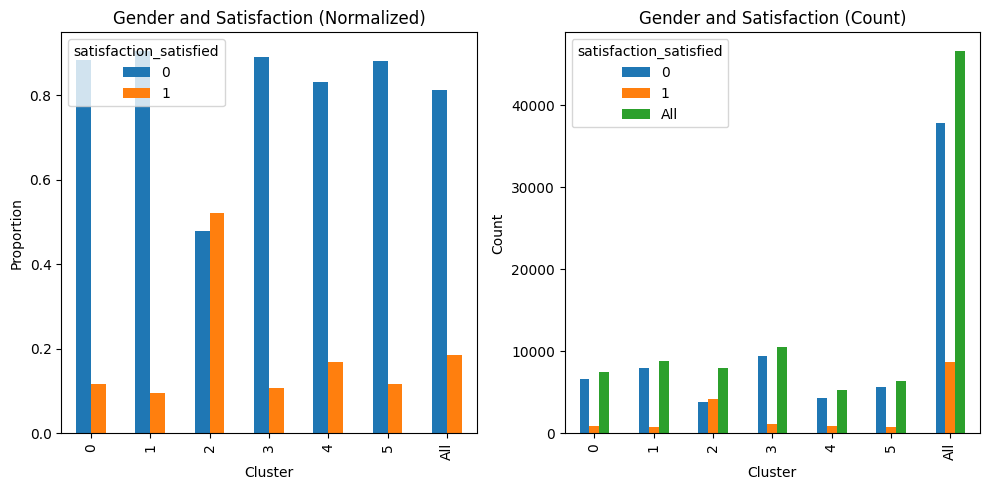

In [42]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


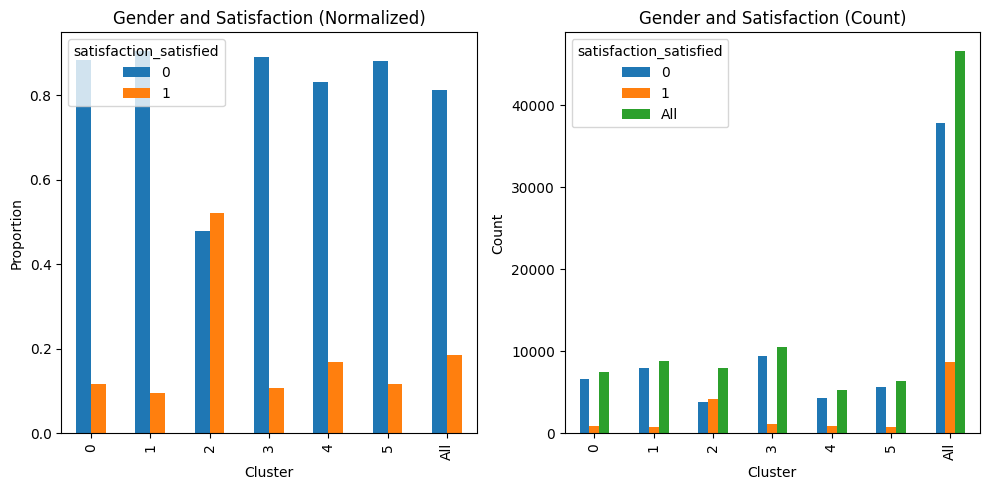

In [43]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


In [44]:
Eco_enc_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'satisfaction_satisfied', 'Cluster'],
      dtype='object')

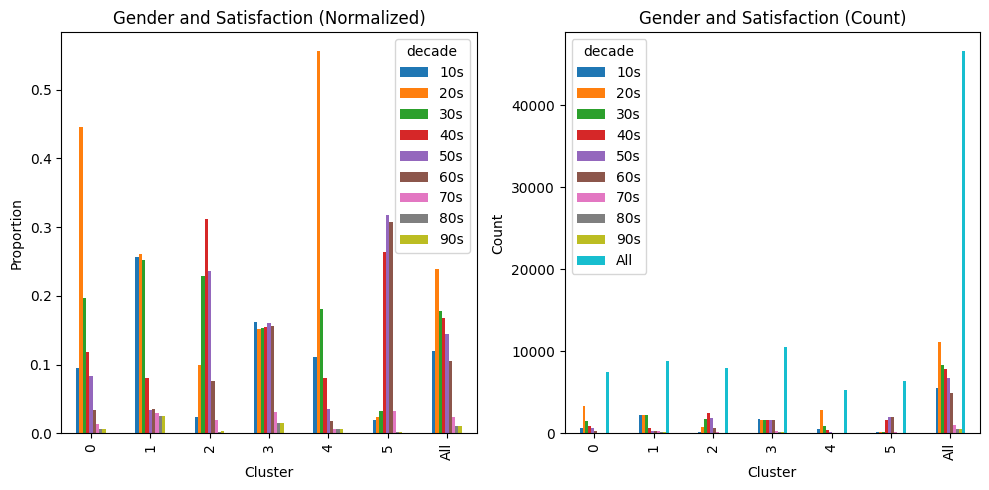

In [57]:
#クラスターごとの年齢の分布

# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['decade'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['decade'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


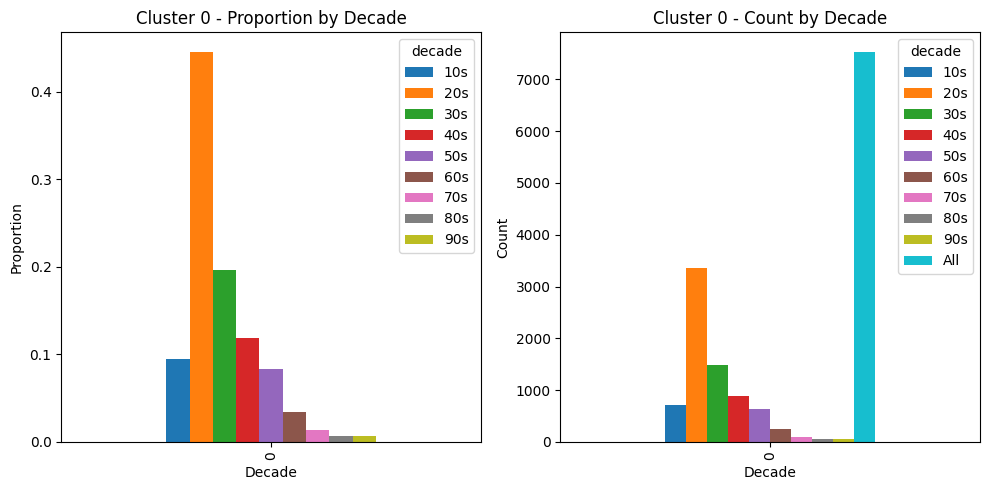

In [58]:
# クラスター0の情報のみ抽出
cluster_0_data = cross.loc[[0], :]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cluster_0_data.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Cluster 0 - Proportion by Decade')

# 右側のグラフ
cluster_0_counts = cross_counts.loc[[0], :]
cluster_0_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Count')
axes[1].set_title('Cluster 0 - Count by Decade')

plt.tight_layout()
plt.show()


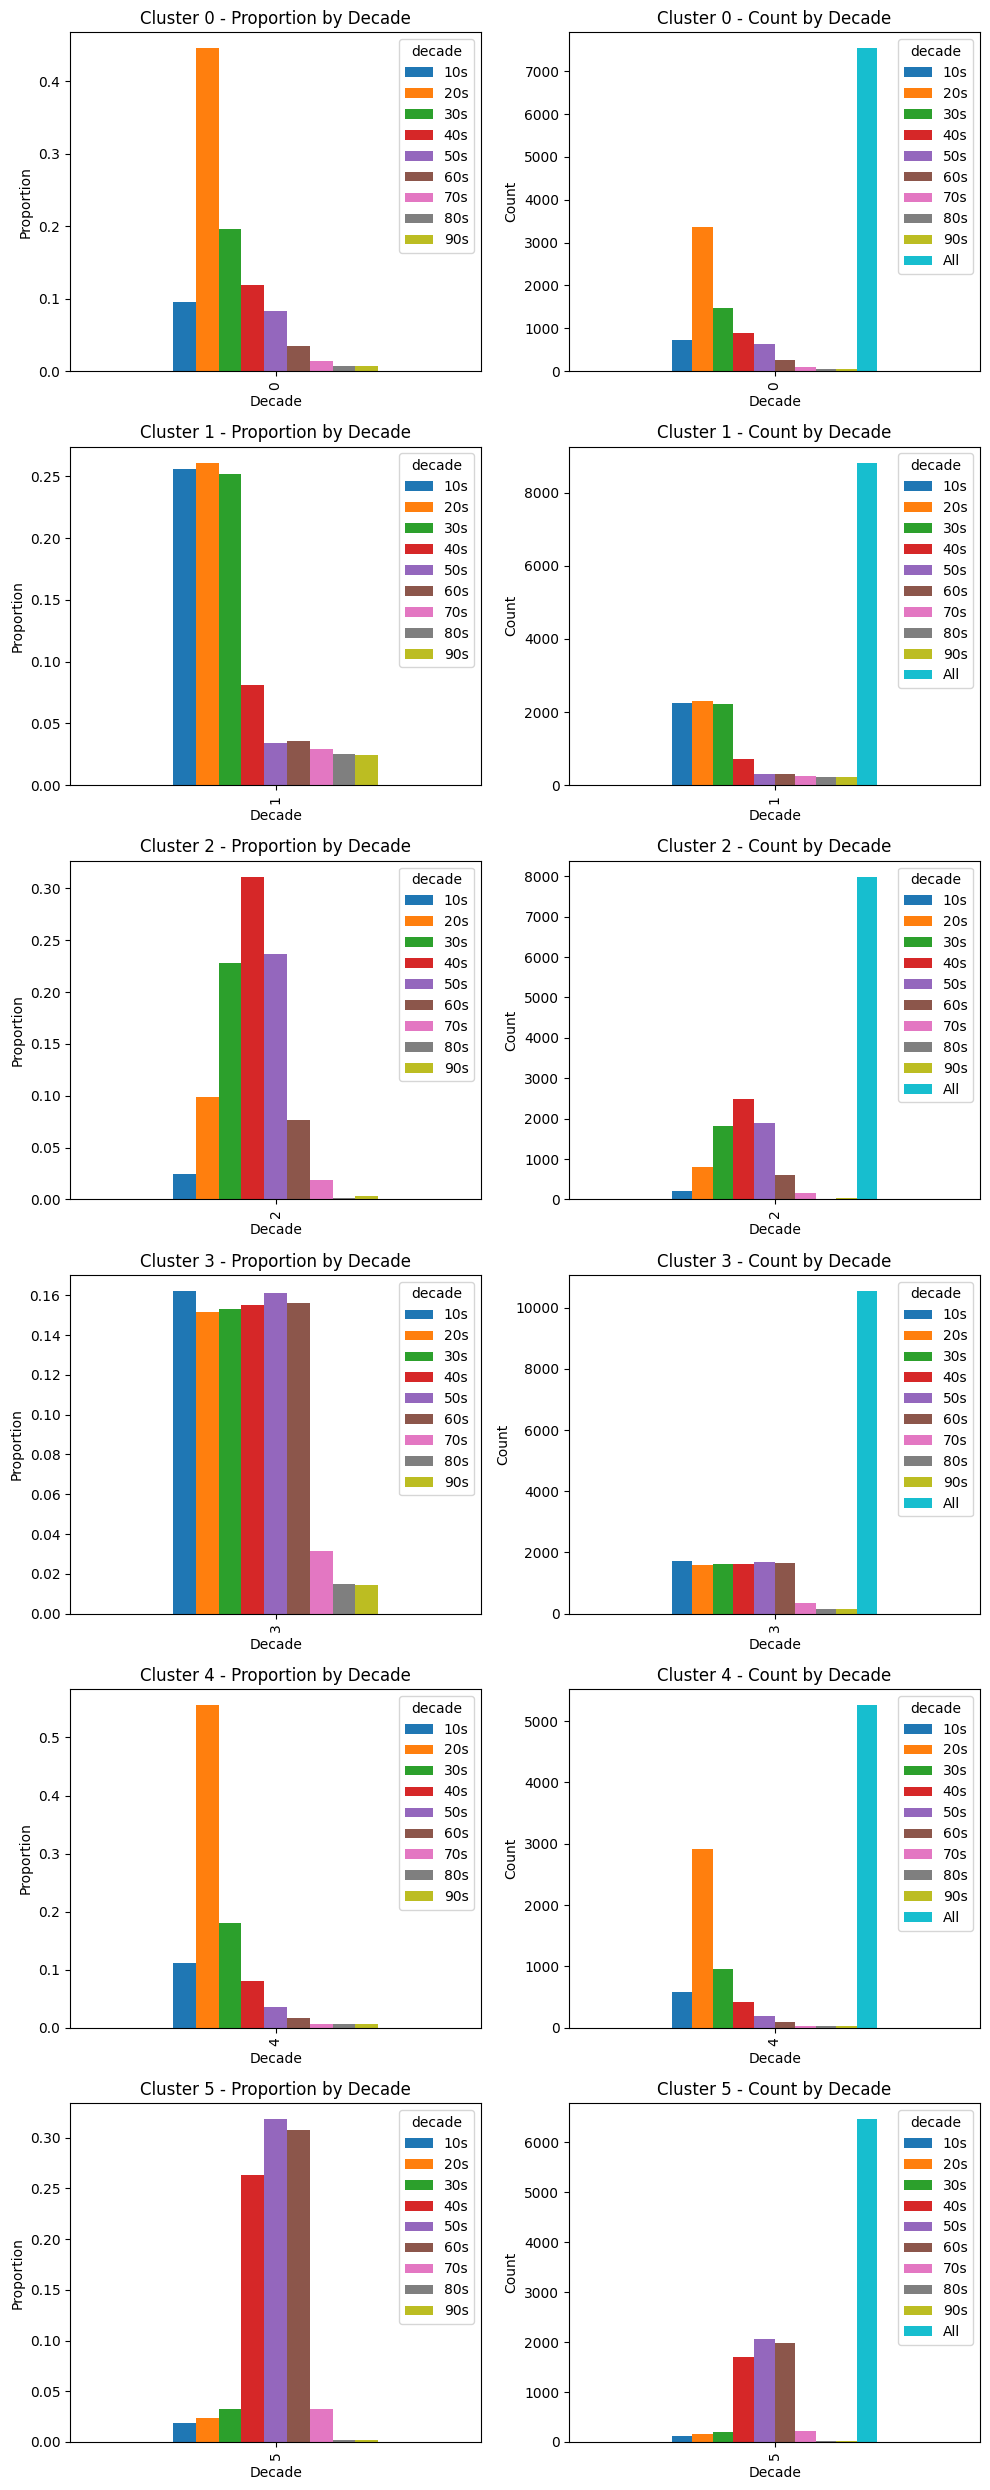

In [59]:
#各クラスターごとの年齢分布
fig, axes = plt.subplots(6, 2, figsize=(10, 25))

for cluster in range(6):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Decade')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Decade')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')

plt.tight_layout()
plt.show()


In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for cluster in range(7):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Decade')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')

    # 右側のグラフ
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Decade')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')

plt.tight_layout()
plt.show()

In [ ]:
features = [ 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'

/tmp/ipykernel_22/2516930569.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


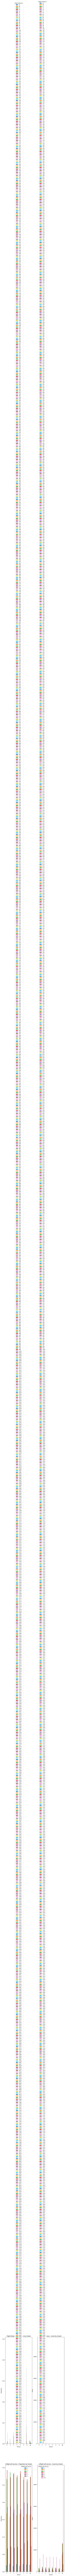

In [165]:
features = [ 'Flight Distance', 'Inflight wifi service',]

fig, axes = plt.subplots(len(features), 2, figsize=(10, 40))

for i, feature in enumerate(features):
    # クラスターごとの分布
    cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df[feature], margins=True, normalize="index")
    cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df[feature], margins=True)

    # 左側のグラフ
    cross.plot(kind="bar", ax=axes[i, 0])
    axes[i, 0].set_xlabel('Cluster')
    axes[i, 0].set_ylabel('Proportion')
    axes[i, 0].set_title(f'{feature} - Proportion by Cluster')

    # 右側のグラフ
    cross_counts.plot(kind="bar", ax=axes[i, 1])
    axes[i, 1].set_xlabel('Cluster')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].set_title(f'{feature} - Count by Cluster')

plt.tight_layout()
plt.show()


In [ ]:
, 'Departure/Arrival time convenient',
           'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
           'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service',
           'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
           'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel',
           'satisfaction_satisfied', 'decade', 'Cluster'

KeyError: "None of [Index(['Flight Distance', 'Inflight wifi service'], dtype='object', name='Inflight wifi service')] are in the [columns]"

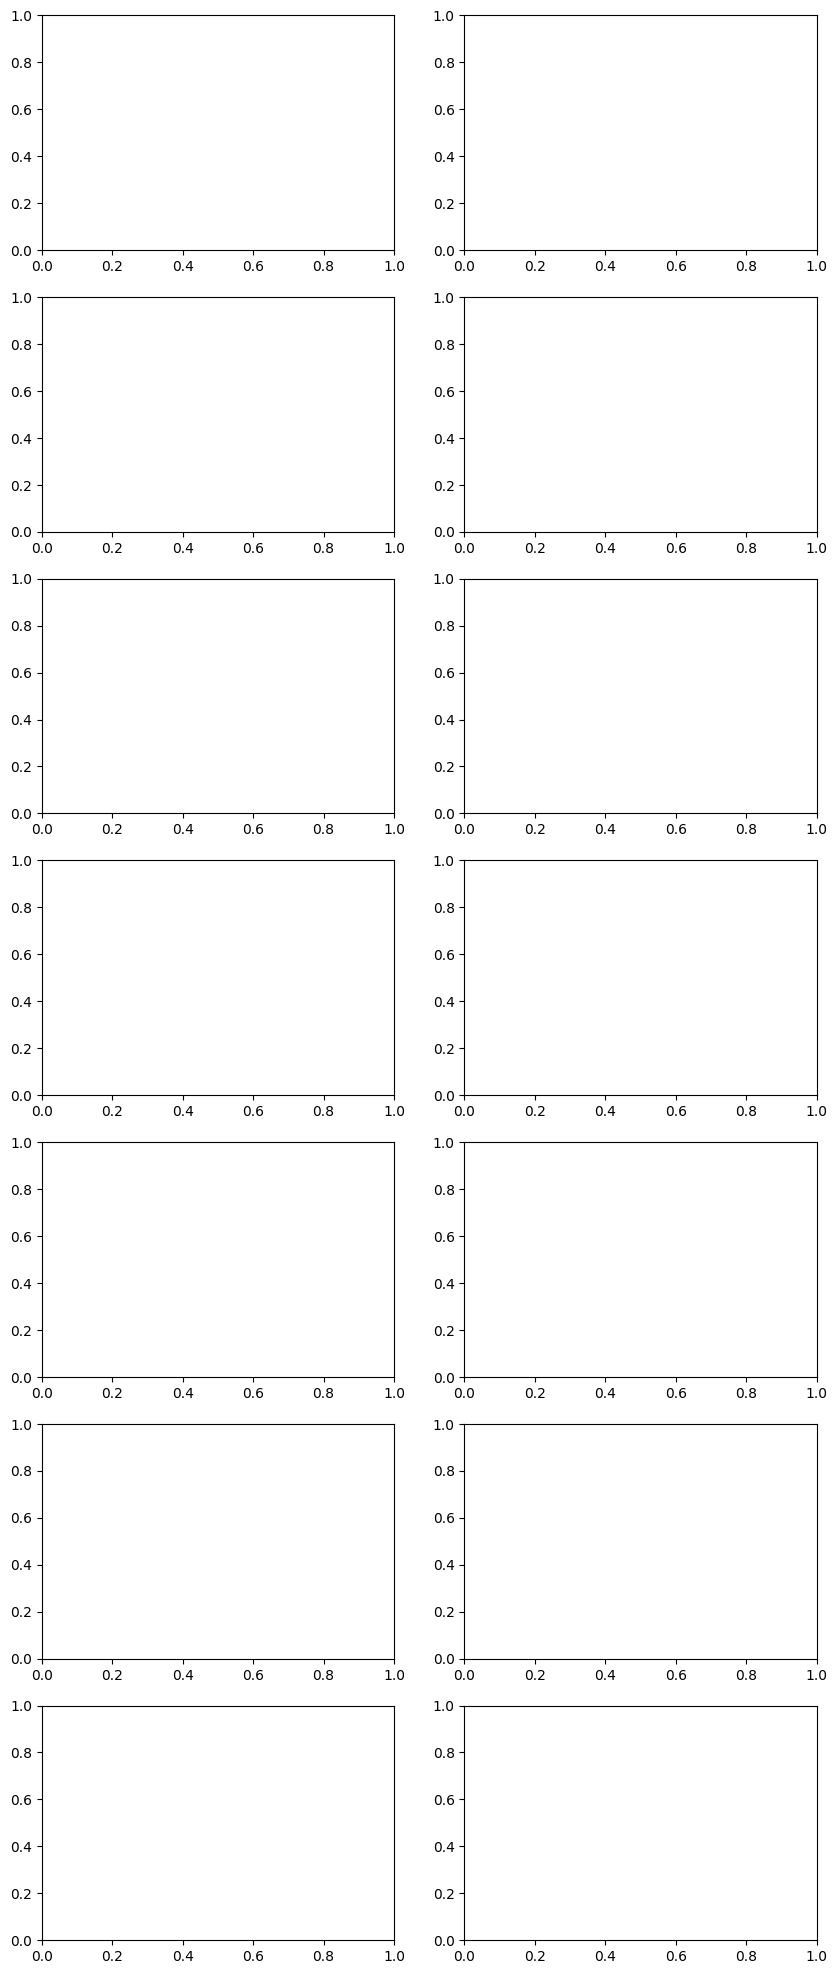

In [166]:
columns = ['Flight Distance', 'Inflight wifi service']

fig, axes = plt.subplots(7, 2, figsize=(10, 25))

for cluster in range(7):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], columns]
    cluster_counts = cross_counts.loc[[cluster], columns]

    # 左側のグラフ
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Columns')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Columns')

    # 右側のグラフ
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Columns')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Columns')

plt.tight_layout()
plt.show()


In [167]:
Eco_enc_df['Flight Distance']

0        1180
1        1276
2        1061
3        1182
4         834
         ... 
46588    1055
46589     867
46590    1620
46591     192
46592    1000
Name: Flight Distance, Length: 46593, dtype: int64

#### 年齢別

In [49]:
#年齢別
Eco_enc_df['decade'] =Eco_enc_df['Age'].astype('str').apply(lambda x:x[0][0]).apply(lambda x: x+ '0s')

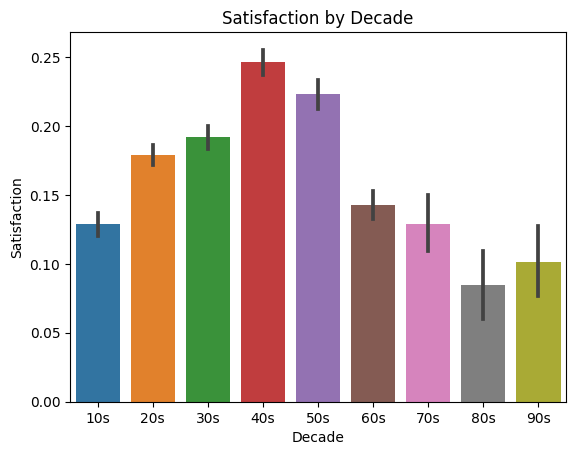

In [50]:
sns.barplot(x='decade', y='satisfaction_satisfied', data=Eco_enc_df.sort_values('decade'))
plt.title('Satisfaction by Decade')
plt.xlabel('Decade')
plt.ylabel('Satisfaction')
plt.show()

satisfaction_satisfied         0         1
decade                                    
10s                     0.871400  0.128600
20s                     0.821297  0.178703
30s                     0.808239  0.191761
40s                     0.753503  0.246497
50s                     0.777104  0.222896
60s                     0.857230  0.142770
70s                     0.871324  0.128676
80s                     0.915464  0.084536
90s                     0.898785  0.101215
All                     0.813899  0.186101

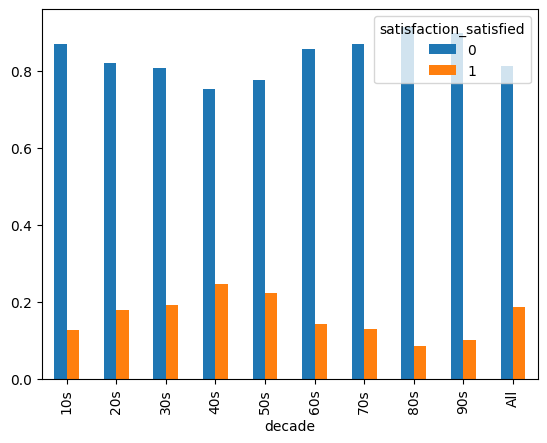

In [51]:
#年齢別満足かどうか
cross = pd.crosstab(Eco_enc_df['decade'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()



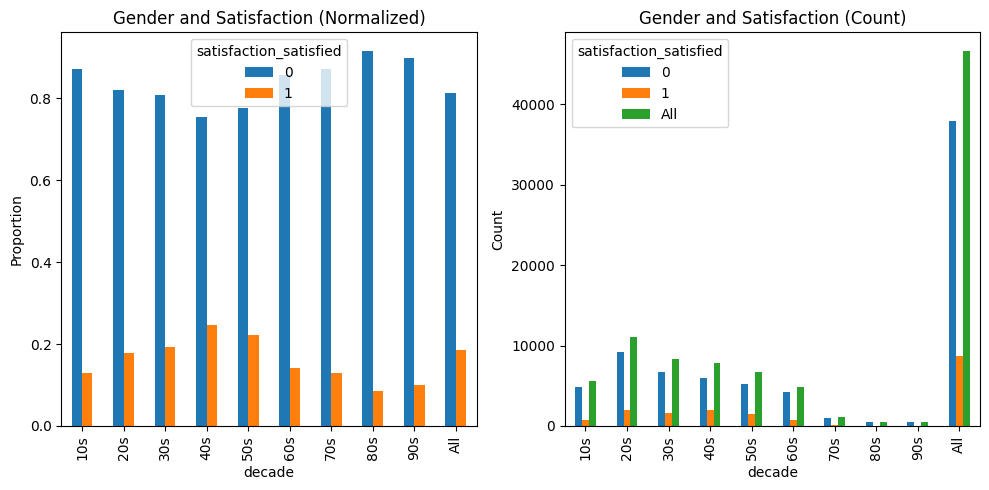

In [52]:
# 年代別のグラフ
cross = pd.crosstab(Eco_enc_df['decade'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('decade')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['decade'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('decade')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


satisfaction_satisfied         0         1
Gender_Male                               
0                       0.816327  0.183673
1                       0.811369  0.188631
All                     0.813899  0.186101

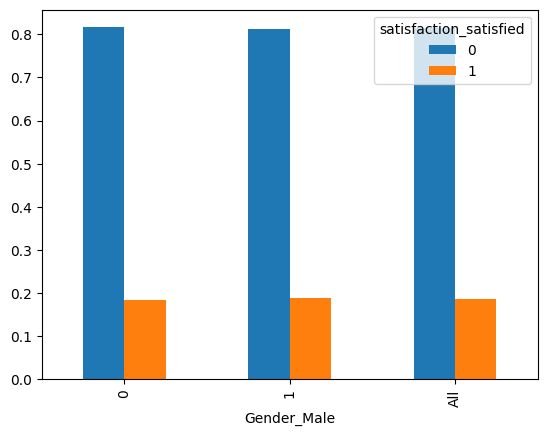

In [53]:
#Gender別
cross = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
display(cross)
cross.plot(kind="bar")
plt.show()

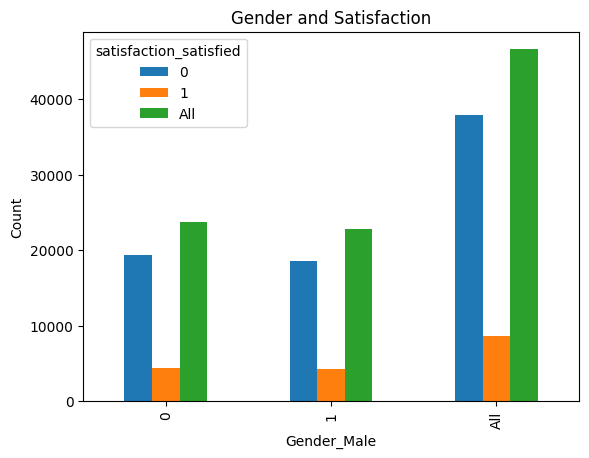

In [54]:
cross = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross.plot(kind="bar")
plt.ylabel('Count')
plt.title('Gender and Satisfaction')
plt.show()

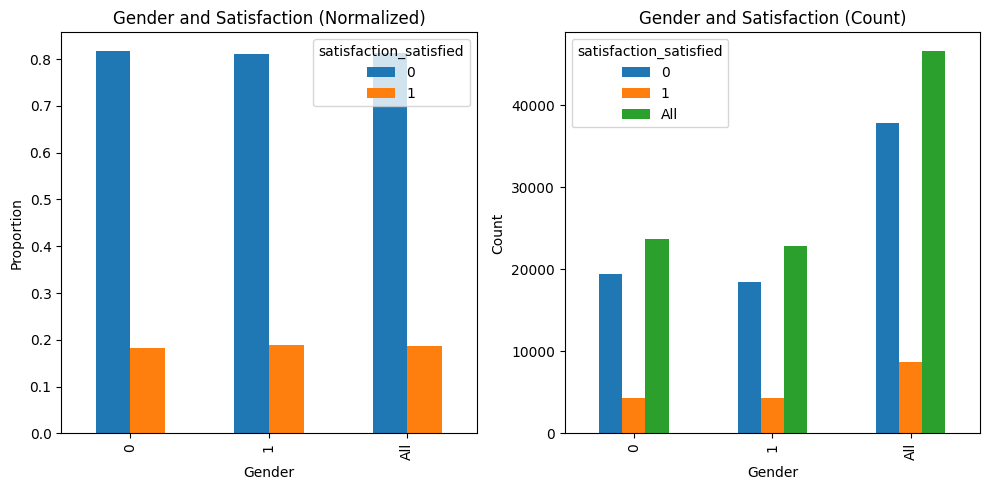

In [55]:
# Gender別のグラフ
cross = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Gender_Male'], Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


In [56]:
Eco_enc_df.sort_values('Flight Distance', inplace=True)

#### Flight Distanceを２つに分けてみる

In [105]:
long_Eco_enc_df = Eco_enc_df[Eco_enc_df['Flight Distance'] > 1300]
short_Eco_enc_df = Eco_enc_df[Eco_enc_df['Flight Distance'] <= 1300]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


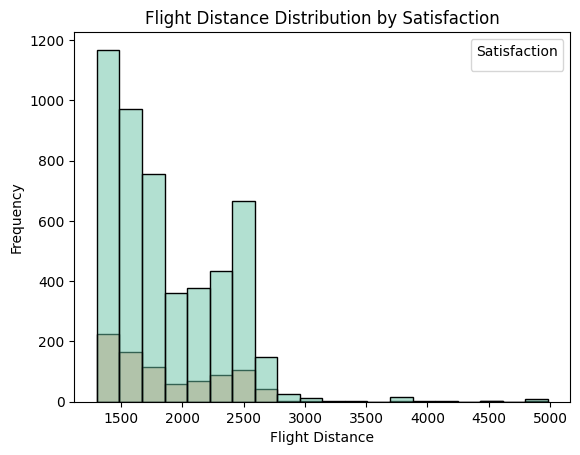

In [106]:
sns.histplot(data=long_Eco_enc_df, x='Flight Distance', bins=20, edgecolor='black', hue='satisfaction_satisfied', palette='Set2')
plt.title('Flight Distance Distribution by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction')
plt.show()

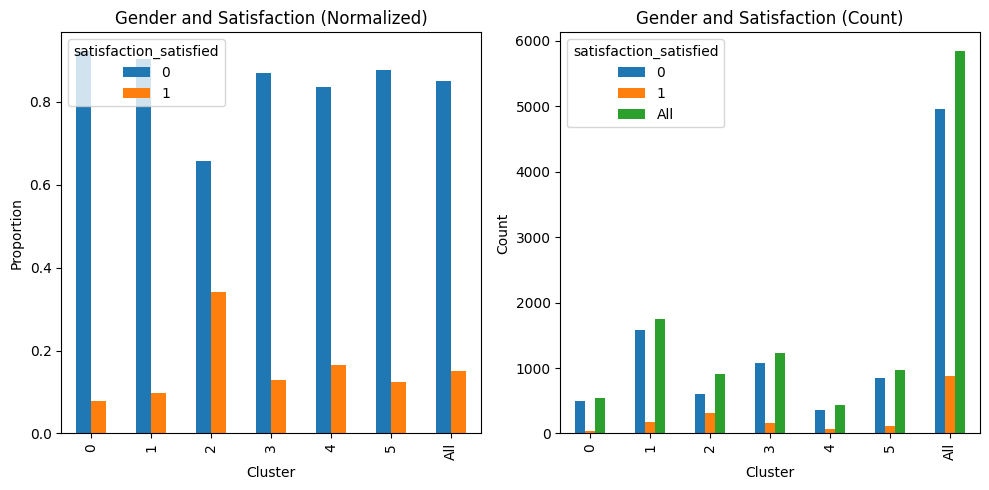

In [62]:
# クラスターごとの分布
cross = pd.crosstab(long_Eco_enc_df['Cluster'], long_Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(long_Eco_enc_df['Cluster'], long_Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


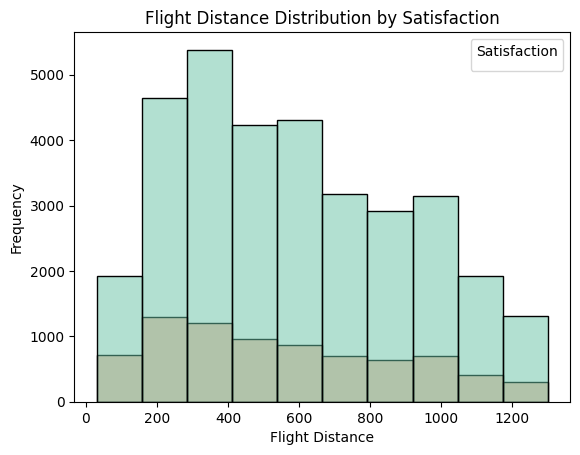

In [63]:
sns.histplot(data=short_Eco_enc_df, x='Flight Distance', bins=10, edgecolor='black', hue='satisfaction_satisfied', palette='Set2')
plt.title('Flight Distance Distribution by Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction')
plt.show()

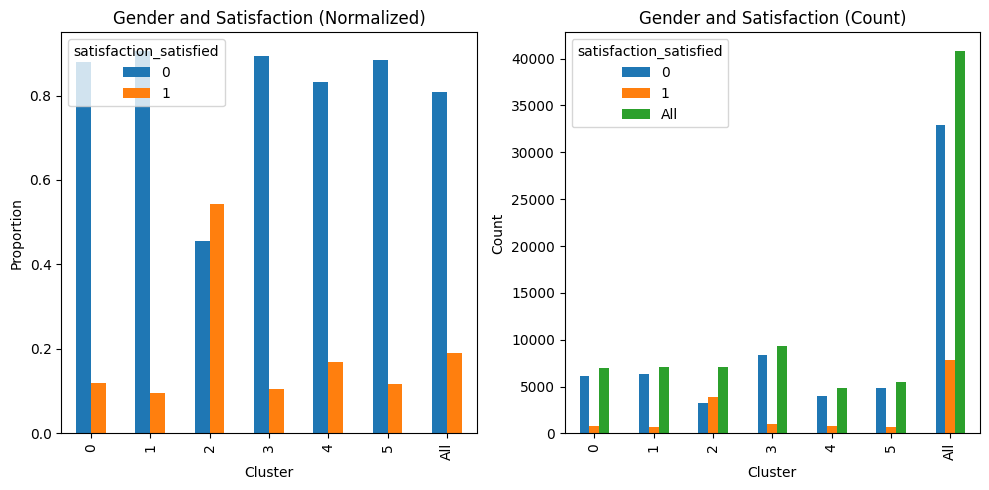

In [64]:
# クラスターごとの分布
cross = pd.crosstab(short_Eco_enc_df['Cluster'], short_Eco_enc_df['satisfaction_satisfied'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')

# 右側のグラフ
cross_counts = pd.crosstab(short_Eco_enc_df['Cluster'], short_Eco_enc_df['satisfaction_satisfied'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')

plt.tight_layout()
plt.show()


## 機内wifiサービス

In [65]:
cluster0_Eco_enc_df

Age  Flight Distance  Inflight wifi service  \
9        9             1174                      2   
16      15             1043                      2   
21      28              731                      2   
28      50              308                      2   
31      50              216                      4   
...    ...              ...                    ...   
46569   26              391                      1   
46581   18              895                      4   
46588   24             1055                      1   
46591   23              192                      2   
46592   22             1000                      1   

       Departure/Arrival time convenient  Ease of Online booking  \
9                                      4                       2   
16                                     2                       2   
21                                     1                       1   
28                                     1                       1   
31                                     0                       4   
...                                  ...                     ...   
46569                                  0                       1   
46581                                  5                       4   
46588                                  1                       1   
46591                                  1                       2   
46592                                  1                       1   

       Gate location  Food and drink  Online boarding  Seat comfort  \
9                  4               2                2             1   
16                 3               5                2             5   
21                 1               2                2             2   
28                 1               2                2             2   
31                 4               4                4             4   
...              ...             ...              ...           ...   
46569              4               3                1             4   
46581              3               4                1             1   
46588              2               1                1             1   
46591              3               2                2             2   
46592              5               1                1             1   

       Inflight entertainment  ...  Checkin service  Inflight service  \
9                           2  ...                4                 3   
16                          5  ...                2                 4   
21                          2  ...                3                 3   
28                          2  ...                2                 3   
31                          4  ...                4                 4   
...                       ...  ...              ...               ...   
46569                       3  ...                4                 4   
46581                       3  ...                1                 3   
46588                       1  ...                5                 4   
46591                       2  ...                2                 3   
46592                       1  ...                5                 4   

       Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
9                2                           0                       4.0   
16               5                           3                       0.0   
21               2                          14                       8.0   
28               2                          18                      12.0   
31               4                           0                       0.0   
...            ...                         ...                       ...   
46569            3                           0                       0.0   
46581            1                         212                     206.0   
46588            1                          13                      10.0   
46591            2                           3     

#### 機内wifiサービス

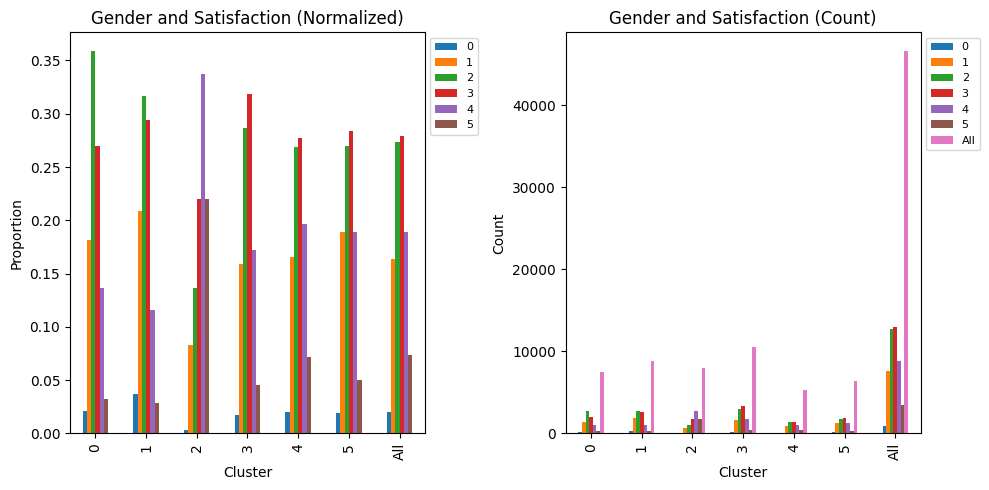

In [80]:
# クラスターごとの機内wifiサービス分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight wifi service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight wifi service'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


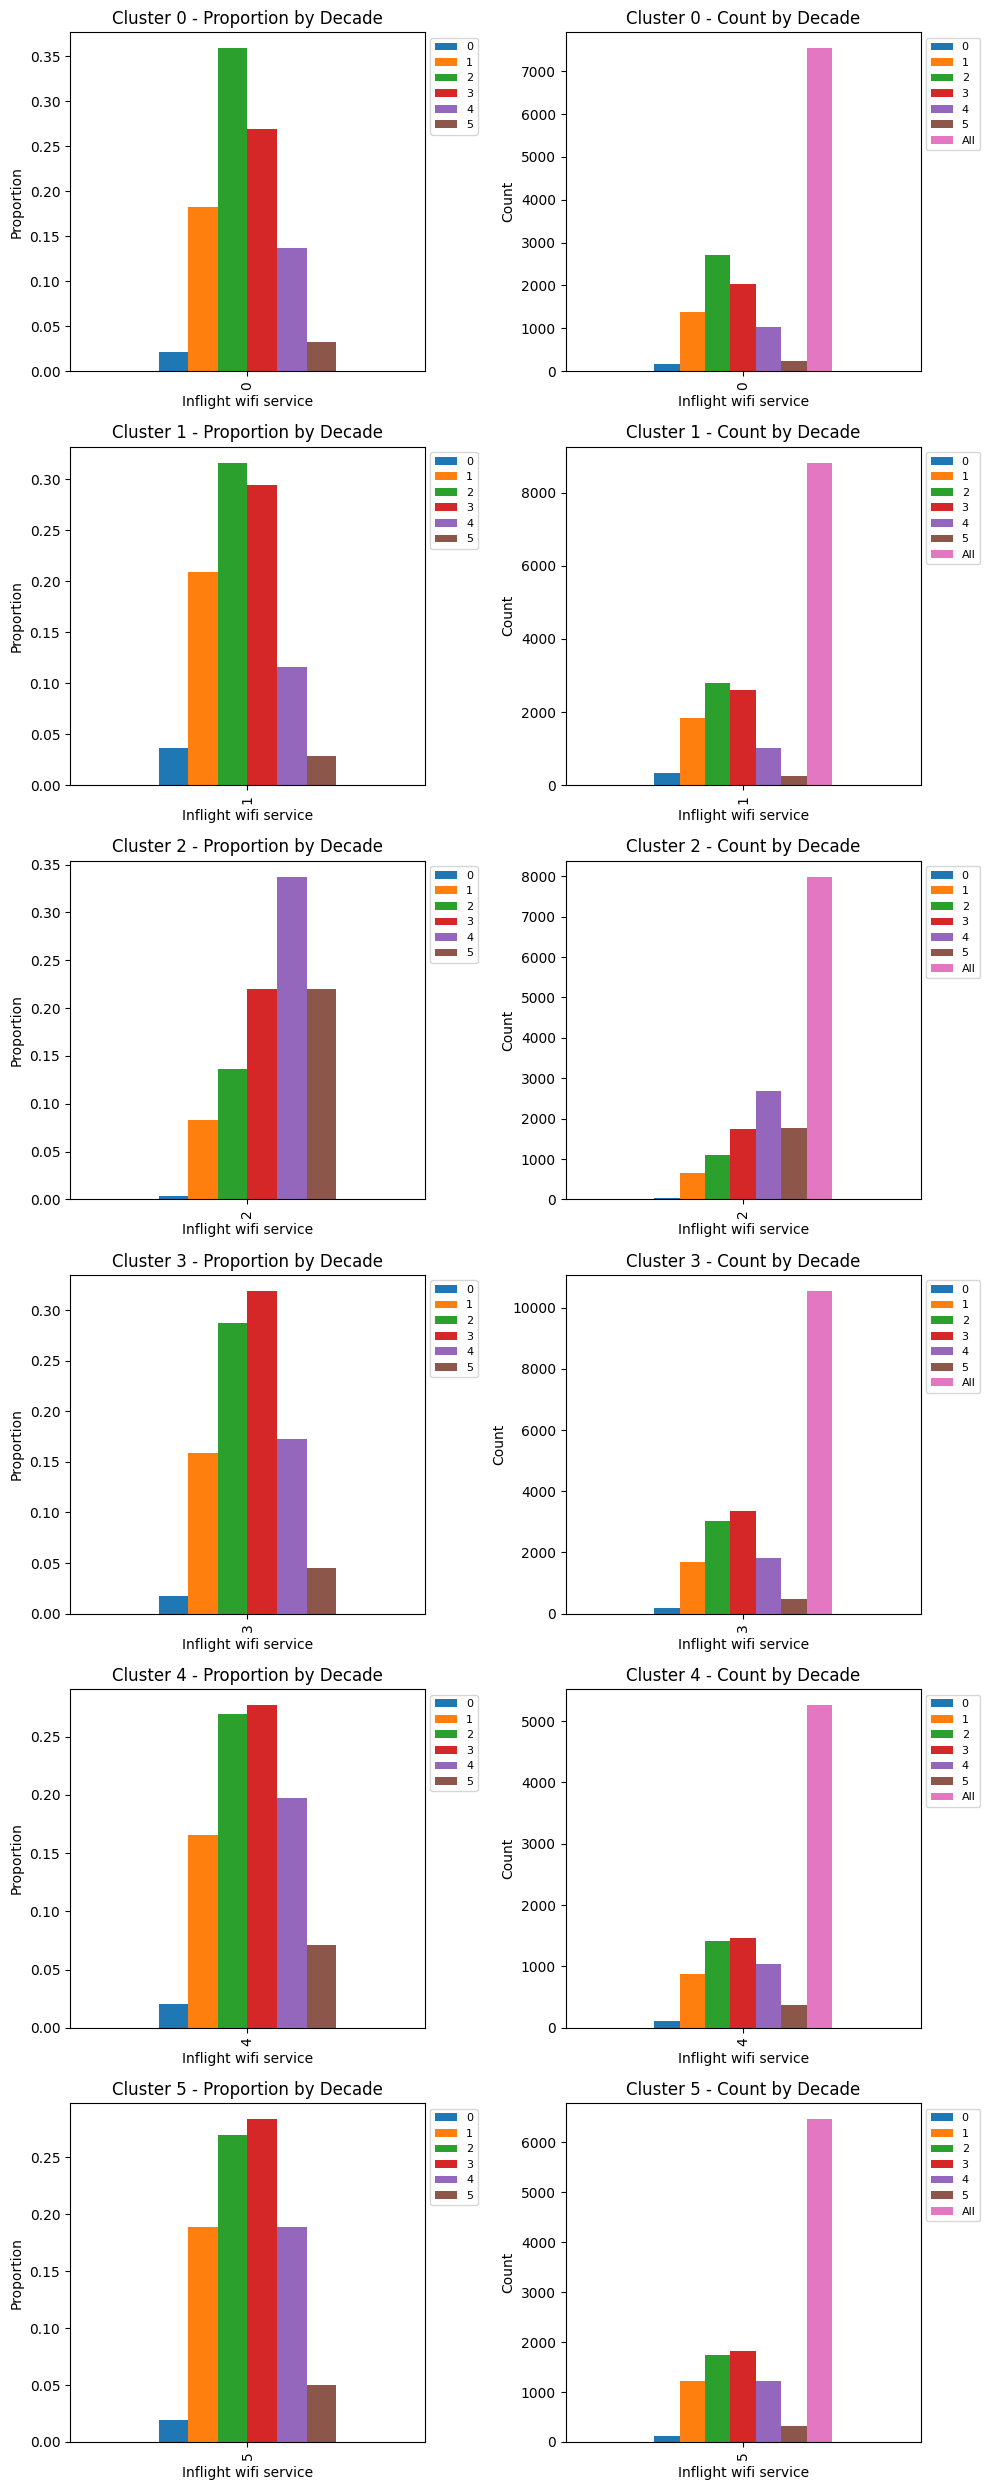

In [81]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Inflight wifi service'], margins=True, normalize="index")
fig, axes = plt.subplots(6, 2, figsize=(10, 25))

for cluster in range(6):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Inflight wifi service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})


    # 右側のグラフ　数値    
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Inflight wifi service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})


plt.tight_layout()
plt.show()



#### 出発・到着時間の利便性

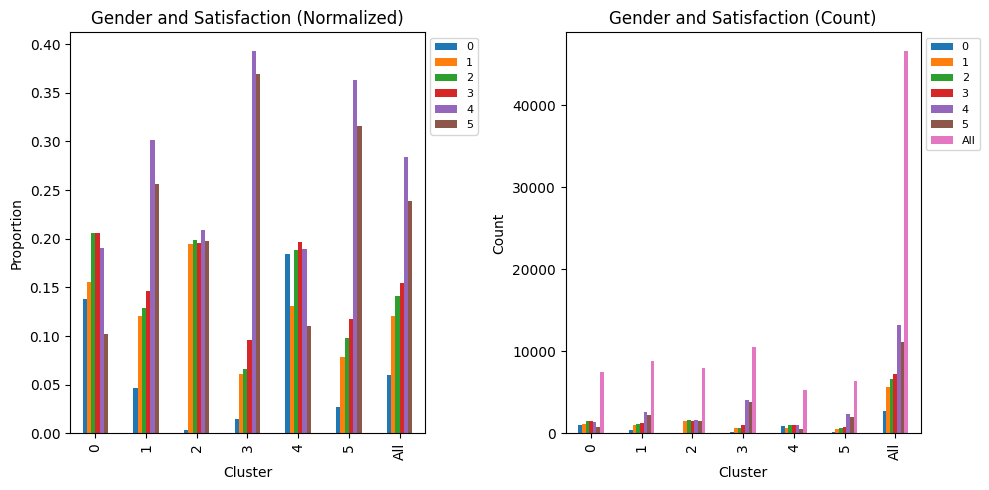

In [76]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


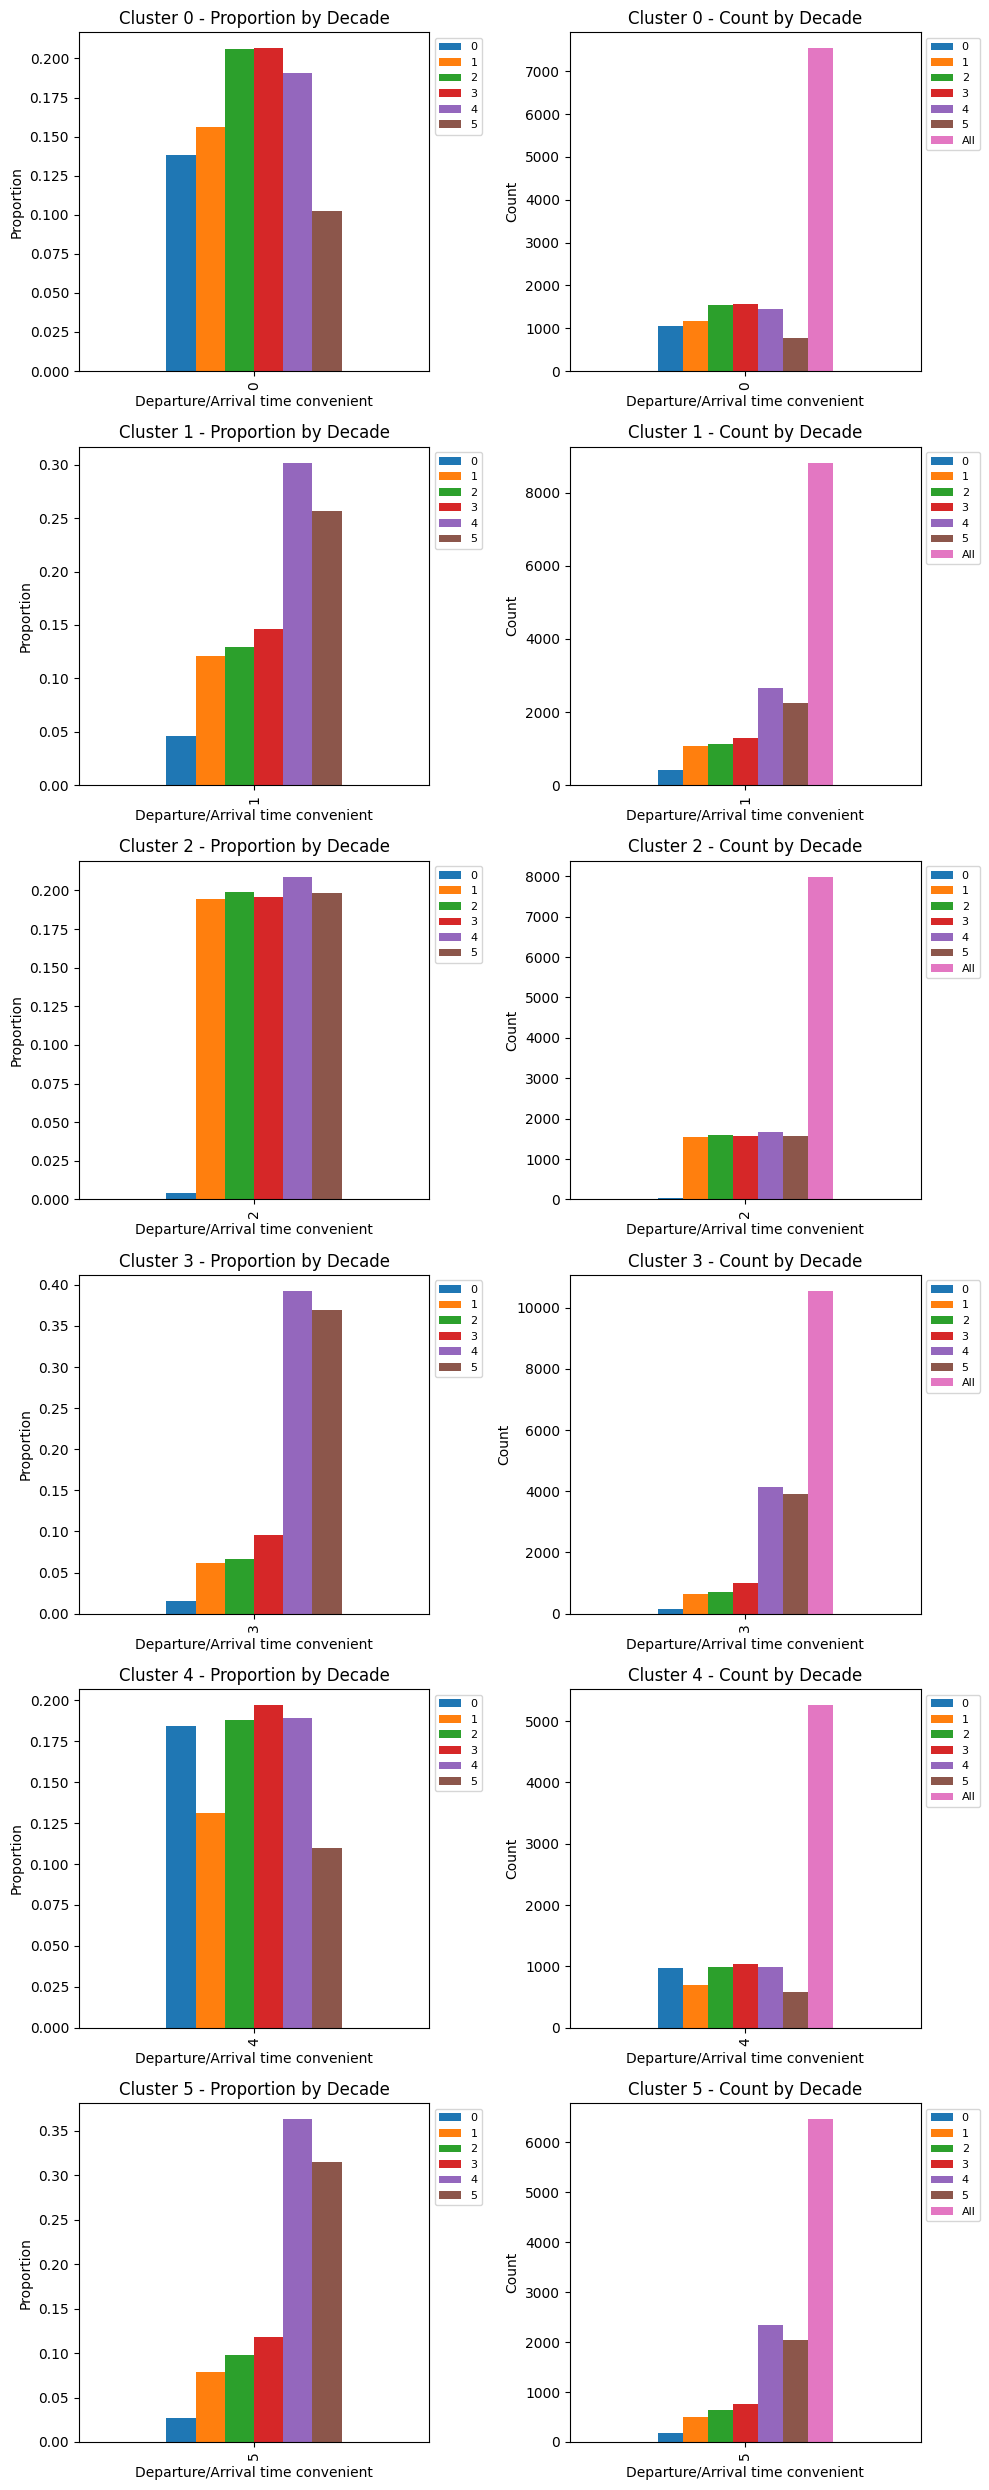

In [78]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Departure/Arrival time convenient'], margins=True, normalize="index")
fig, axes = plt.subplots(6, 2, figsize=(10, 25))

for cluster in range(6):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Departure/Arrival time convenient')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Departure/Arrival time convenient')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()

#### オンライン予約のしやすさ

In [82]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Ease of Online bookinga'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Gender and Satisfaction (Normalized)')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Ease of Online bookinga'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender and Satisfaction (Count)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


KeyError: 'Ease of Online bookinga'

In [ ]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster'], Eco_enc_df['Ease of Online bookinga'], margins=True, normalize="index")
fig, axes = plt.subplots(6, 2, figsize=(10, 25))

for cluster in range(6):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Ease of Online bookinga')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Decade')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Ease of Online bookinga')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Decade')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()